In [7]:
### for saving the trained language vector to a file
import pickle
def save_obj(obj, name ):
    with open( 'obj/'+ name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name ):
    with open('obj/' + name + '.pkl', 'rb') as f:
        return pickle.load(f)    
    
lang=["bul","deu","eng","dan","fra","ita","nld","pol","ron"]


In [2]:
import re
from itertools import product 
import string
import random
import numpy as np
from os import listdir
from os.path import isfile, join
from unidecode import unidecode
from tqdm import notebook as nb
from numpy import dot
from numpy.linalg import norm
from scipy import spatial
import sys
from tqdm.notebook import  tqdm
randomSeed=int(1e9)+7
import pandas as pd

path = "data/train_data"
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
class_list = []
temp=[]
lang_list = []

temp_test = []
test_class_list = []
test_lang_list = []
# {"bul": 0, "deu":1, "eng":2, "dan":3, "fra":4, "ita":5, "nld":6, "pol":7, "ron":8}
for file in onlyfiles:
    counter = 0
    file_name = file
    class_name = file_name.split("_")[0]
    class_name_int = 0
    if 'bul' == class_name:
        class_name_int = 0
    elif 'deu' == class_name:
        class_name_int = 1
    elif 'eng' == class_name:
        class_name_int = 2
    elif 'dan' == class_name:
        class_name_int = 3
    elif 'fra' == class_name:
        class_name_int = 4
    elif 'ita' == class_name:
        class_name_int = 5
    elif 'nld' == class_name:
        class_name_int = 6
    elif 'pol' == class_name:
        class_name_int = 7
    else:
        class_name_int = 8
            
    with open(path+"/"+file, encoding='utf-8') as f:
        for line in f:
            decoded = unidecode(line)
            decoded = decoded.split("\t")[1]
            counter = counter + 1
            if counter <= 9000:
                temp.append(decoded)
                class_list.append(class_name_int)
                lang_list.append(class_name)
            else:
                temp_test.append(decoded)
                test_class_list.append(class_name_int)
                test_lang_list.append(class_name)

df_train = pd.DataFrame(temp, columns =['text'])
df_train['class'] = class_list 
df_train['lang'] = lang_list 
df_train.to_csv("train_dataset_final_1.csv")

df_train

,text,class,lang
0,"10 fakta za Dzhanet Iel'n - zhenata, koiato ve...",0,bul
1,"11. Nie viarvame, che edna znachitelna chast o...",0,bul
2,120 khil. lv. biakha otkradnati kato na kino o...,0,bul
3,12:10 - t'rsiat Karbovski ot Sofiiskiia univer...,0,bul
4,12-godishno momichentse se obesi chas sled igr...,0,bul
...,...,...,...
80995,Stirile judetului BihorStiri inter(nationale)C...,8,ron
80996,Stirile judetului BihorStiri inter(nationale)C...,8,ron
80997,Stirile judetului BihorStiri inter(nationale)C...,8,ron
80998,Stirile judetului BihorStiri inter(nationale)C...,8,ron


In [25]:
df_test = pd.DataFrame(temp_test, columns =['text'])
df_test['class'] = test_class_list 
df_test['lang'] = test_lang_list 
df_test.to_csv("test_dataset_final_1.csv")
df_test

,text,class,lang
0,Tova s'obshchi vchera shefkata Vsichki prava z...,0,bul
1,Tova s'obshchi govoriteliat na TsIK Kameliia N...,0,bul
2,Tova s'obshchi za dezhurniiat sinoptik Martin ...,0,bul
3,Tova s'obshchi za Martina Tsvetanova - dezhure...,0,bul
4,"Tova s'obshchi za Radio ""Fokus"" - Varna d-r Pe...",0,bul
...,...,...,...
8995,"Zwischen Regierungen, Unternehmen, Burgern und...",1,deu
8996,Zwischen Schloss- und Kaiserstrasse wird sie a...,1,deu
8997,Zwischen und nach den Auftritten wird die Band...,1,deu
8998,Zwischenzeitlich rutschte er als Industrieller...,1,deu


In [8]:
import pandas as pd
df_train = pd.read_csv("train_dataset_final.csv")
df_test = pd.read_csv("test_dataset_final.csv")

In [9]:
import re
from itertools import product 
import string
import random
import numpy as np
from os import listdir
from os.path import isfile, join
from unidecode import unidecode
from tqdm import notebook as nb
from numpy import dot
from numpy.linalg import norm
from scipy import spatial
import sys
from tqdm.notebook import  tqdm
randomSeed=int(1e9)+7

def cosineSimiliraty(a,b):
    cos_sim = dot(a, b)/(norm(a)*norm(b))
    #cos_sim = 1 - spatial.distance.cosine(a, b)
    return cos_sim

def filter(text):
    text=text.lower()
    output_text = re.sub('[^a-z- ]+', '', text)
    output_text=output_text.replace('-','')
    return output_text

def rand_bin_array(d = 10000):
    K=d//2
    arr = np.ones(d)
    arr[K:]  = -1
    np.random.shuffle(arr)
    return arr
    
def getAlphabet(d=10000):
    alphabet = {} 
    keys = [i for i in string.ascii_lowercase]+[" "] #+[i for i in string.ascii_uppercase]
    for i in keys:
        alphabet[i]=rand_bin_array(d=d)
    return alphabet

def genTextVector(text,alphabet,window=4,d=10000):
    final = np.zeros(d)
    text = list(text)
    for i in range(len(text)-window+1):
        cur = text[i:i+window]
        temp = np.ones(d)
        for j in range(1,window+1):
            arr = alphabet[cur[j-1]]#.copy()
            for k in range(j):
                #arr=np.roll(arr, 1)
                arr=np.random.RandomState(seed=randomSeed).permutation(arr)
            temp*=arr
        
        final+=temp
    return final/np.linalg.norm(final,ord=2)

def train():
    global lang_vectors
    toolbar_width = df_train.shape[0]
    print("Total samples: ",toolbar_width)

    
    lang_vectors={}
    k=0
    with tqdm(total=toolbar_width) as pbar:
        for language in lang:
            df_lang = df_train[df_train['lang'] == language]
            lang_vector = np.zeros(d)
            for index, row in df_lang.iterrows():
                newText = row['text']
                filteredText=filter(newText)
                lang_vector+=genTextVector(filteredText,alphabet,d=d)
                pbar.update(1)
            lang_vectors[language]=lang_vector/np.linalg.norm(lang_vector,ord=2)
            k+=1

        

def test(text):
    testFilteredText = genTextVector(filter(text), alphabet)
    results = {}
    for language in lang:
        results[language] = cosineSimiliraty(lang_vectors[language], testFilteredText)
        
    best=max(results, key=results.get)
    return best,results

if __name__ == '__main__':
    random.seed(randomSeed)
    np.random.seed(randomSeed)
    d=10000
    alphabet = getAlphabet(d=d)
    



In [10]:
## If a new training is reqired run this. Train files are saved and can be loaded in next cell

train()

Total samples:  81000


In [31]:
len(lang_vectors['bul'])

10000

In [11]:
#### Load the lang_vectors file from saved train file

save_obj(lang_vectors,"task_1_9_languages_window_4")
# lang_vectors = load_obj("task_1_9_languages_window_4")

In [12]:
### test for a individual sample



### Bulgarian text
#newText="120 хил. лв. бяха откраднати като на кино от обменно бюро близо до автогарата в Дулово, след като бандитите - двама маскирани мъже, проследили и нападнали служител, който пренасял в торба пари, съобщиха от прокуратурата."

### German text
# newText="Once we demonstrate that aspect of secrecy and we describes how Member State ministers even vote, then those ministers are detained burden back home in their Member States and bitterly national gens feel linkage to all lawsuit European."

newText = "About 200 multitude descend out to defend navigate and to dance to the enceinte stria phone of post-war music."
### English text
#newText="A 1 Territory government would start, again using world’s best practice to deal with intractable, damaged and lost youth to turn them back into productive citizens and repay their victims for their crimes."


best,results=test(newText)
print("Best : ",best,results[best])
results

Best :  eng 0.27094943969029184


{'bul': 0.0513294661834461,
 'deu': 0.03426969347629254,
 'eng': 0.27094943969029184,
 'dan': 0.04503235087658671,
 'fra': 0.08363647390545957,
 'ita': 0.09354239861637562,
 'nld': 0.0435045812929891,
 'pol': 0.053096727356183,
 'ron': 0.06507935790992074}

In [ ]:
correct = 0
import pandas as pd
df_test = pd.read_csv("attack_test_data.csv")

for index, row in df_test.iterrows():
    best, results=test(row['text'])
    if best == row['lang']:
        correct = correct + 1
        
print("final accuracy", correct/200)

In [25]:
test_data = []
for index, row in df_test.iterrows():
    line = row['text']
    actual = row['lang']
    test_data.append([actual,line])

In [26]:


total=len(test_data) 
print("Total test data: ",total)

final_results = {}
for language in lang:
    language_list = {}
    for language_element in lang:
        language_list[language_element] = 0
        
    final_results[language] = language_list

with tqdm(total=total) as pbar:
    for line in test_data:
        actual = line[0]
        text = line[1]
        predicted,_= test(text)
        final_results[actual][predicted]+=1
        pbar.update(1)


Total test data:  9000


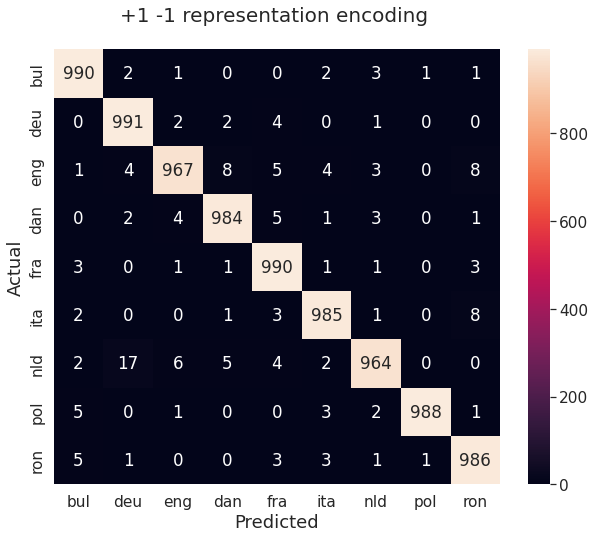

In [28]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(font_scale=1.4)
array = np.array([final_results[x][y] for x in final_results for y in final_results[x] ])
array=array.reshape(9,9)
df_cm = pd.DataFrame(array, index = [i for i in lang],
                  columns = [i for i in lang])

plt.figure(figsize = (10,8))


sn.heatmap(df_cm, annot=True,fmt='g')
plt.title('+1 -1 representation encoding \n', fontsize=20)
plt.xlabel("Predicted", fontsize=18)
plt.ylabel("Actual", fontsize=18)
plt.show()

In [29]:
tot_correct=0
total=0
for i in range(9):
    for j in range(9):
        total+=array[i][j]
    tot_correct+=array[i][i]
print("Accuracy : ",str(tot_correct/total*100)+"%")

Accuracy :  98.27777777777777%


In [30]:
class HDModel():
    def __init__(self, lang_vectors, alphabet, seed, dimension):
        self.lang_vectors = lang_vectors
        self.alphabet = alphabet
        self.seed = seed
        self.dimension = dimension
        
    def genTextVector(self, text, window=4):
        final = np.zeros(self.dimension)
        text = filter(text)
        text = list(text)
        for i in range(len(text)-window+1):
            cur = text[i:i+window]
            temp = np.ones(self.dimension)
            for j in range(1,window+1):
                arr = alphabet[cur[j-1]]
                for k in range(j):
                    arr=np.random.RandomState(seed=self.seed).permutation(arr)
                temp*=arr

            final+=temp
        return final/np.linalg.norm(final,ord=2)

    def load_obj(self, name):
        with open('obj/' + name + '.pkl', 'rb') as f:
            return pickle.load(f)

In [31]:
import pandas as pd
import pickle
import random

from textattack.models.wrappers import ModelWrapper


class HDModelWrapper(ModelWrapper):
    """Loads a scikit-learn model and tokenizer (tokenizer implements
    `transform` and model implements `predict_proba`).
    May need to be extended and modified for different types of
    tokenizers.
    """

    def __init__(self, model):
        self.model = model
        
    def __call__(self, text_input_list, batch_size=None):
        results_out = []
#         print(text_input_list)
        for text in text_input_list:
            testFilteredText = self.model.genTextVector(text)
            results_temp = []
            for language in lang:
                results_temp.append(cosineSimiliraty(lang_vectors[language], testFilteredText))
        
            results_out.append(results_temp)
            best=max(results, key=results.get)
#         results_out = np.array(results_out)
        return results_out
        
    def get_grad(self, text_input):
        raise NotImplementedError()
        
    def cosineSimiliraty(self, a,b):
        cos_sim = dot(a, b)/(norm(a)*norm(b))
        #cos_sim = 1 - spatial.distance.cosine(a, b)
        return cos_sim

In [32]:
model = HDModel(lang_vectors, alphabet, randomSeed, 10000)
model_wrapper = HDModelWrapper(model)

In [33]:
import textattack
df_attack = pd.read_csv("attack_test_data.csv")

data = []
for index, row in df_attack.iterrows():
    data.append((row['text'], row['class']))

dataset = textattack.datasets.Dataset(data)

In [37]:
data

[('United Kingdom and United States sanctions against Zimbabwe illustrate the "warm-up" approach, followed by a "knock-out" punch.\r\n',
  2),
 ("While presenting the report, Hon. Bright pleaded that in view of the sacrifices Mrs. Jonathan's husband made for the country while he was president, the House should wade into the matter and call the security agencies to order.\r\n",
  2),
 ('"You have the two extremes as far as different reasons for crop insurance," he said.\r\n',
  2),
 ('While the nation has seen 7.6 percent job growth since 2013, Kansas has lagged far behind, with an anemic rate of 3.5 percent.\r\n',
  2),
 ('WASHINGTON, D.C. -- President George Bush has praised efforts by Colombian President Alvaro Uribe to crack down on terrorism in the South American country.\r\n',
  2),
 ('While the federal government is up and running, at least for a few weeks, many Greenbelters felt the stress of preparing for a shutdown.\r\n',
  2),
 ('Your insistence, your determination to stick t

In [19]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /home/harsha/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

In [24]:
from textattack.datasets import HuggingFaceDataset
from textattack.attack_recipes import TextFoolerJin2019, DeepWordBugGao2018, TextBuggerLi2018, GeneticAlgorithmAlzantot2018, PWWSRen2019
from textattack import Attacker
from textattack import AttackArgs

# dataset = custom_dataset
attack = DeepWordBugGao2018.build(model_wrapper)

# dataset = HuggingFaceDataset("newsgroup", None, "test")

attack_args = AttackArgs(num_examples=200, log_to_csv="hd_attack_deepwordbug_window_5.csv")
attacker = Attacker(attack, dataset, attack_args)
attacker.attack_dataset()



textattack: Unknown if model of class <class '__main__.HDModel'> compatible with goal function <class 'textattack.goal_functions.classification.untargeted_classification.UntargetedClassification'>.
textattack: Logging to CSV at path hd_attack_textfooler_window_4.csv
  0%|                                                   | 0/200 [00:00<?, ?it/s]

Attack(
  (search_method): GreedyWordSwapWIR(
    (wir_method):  delete
  )
  (goal_function):  UntargetedClassification
  (transformation):  WordSwapEmbedding(
    (max_candidates):  50
    (embedding):  WordEmbedding
  )
  (constraints): 
    (0): WordEmbeddingDistance(
        (embedding):  WordEmbedding
        (min_cos_sim):  0.5
        (cased):  False
        (include_unknown_words):  True
        (compare_against_original):  True
      )
    (1): PartOfSpeech(
        (tagger_type):  nltk
        (tagset):  universal
        (allow_verb_noun_swap):  True
        (compare_against_original):  True
      )
    (2): UniversalSentenceEncoder(
        (metric):  angular
        (threshold):  0.840845057
        (window_size):  15
        (skip_text_shorter_than_window):  True
        (compare_against_original):  False
      )
    (3): RepeatModification
    (4): StopwordModification
    (5): InputColumnModification(
        (matching_column_labels):  ['premise', 'hypothesis']
       

2022-04-30 11:30:55.183535: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-04-30 11:30:55.183564: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-04-30 11:30:55.183582: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (mylaptop): /proc/driver/nvidia/version does not exist
2022-04-30 11:30:55.183762: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
  0%|▏                                      | 1/200 [06:47<22:30:37, 407.23s/it]/home/harsha/.local/lib/python3.8/

--------------------------------------------- Result 1 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

United Kingdom and United States sanctions against Zimbabwe illustrate the "warm-up" approach, followed by a "knock-out" punch.





[Succeeded / Failed / Skipped / Total] 0 / 1 / 0 / 1:   1%| | 2/200 [13:23<22:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 2 / 0 / 2:   1%| | 2/200 [13:23<22:05

--------------------------------------------- Result 2 ---------------------------------------------
[[2 (17%)]] --> [[[FAILED]]]

While presenting the report, Hon. Bright pleaded that in view of the sacrifices Mrs. Jonathan's husband made for the country while he was president, the House should wade into the matter and call the security agencies to order.





[Succeeded / Failed / Skipped / Total] 0 / 2 / 0 / 2:   2%| | 3/200 [14:12<15:33/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 3 / 0 / 3:   2%| | 3/200 [14:12<15:33

--------------------------------------------- Result 3 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"You have the two extremes as far as different reasons for crop insurance," he said.





[Succeeded / Failed / Skipped / Total] 0 / 3 / 0 / 3:   2%| | 4/200 [16:24<13:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 4 / 0 / 4:   2%| | 4/200 [16:24<13:23

--------------------------------------------- Result 4 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

While the nation has seen 7.6 percent job growth since 2013, Kansas has lagged far behind, with an anemic rate of 3.5 percent.





[Succeeded / Failed / Skipped / Total] 0 / 4 / 0 / 4:   2%| | 5/200 [18:51<12:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 5 / 0 / 5:   2%| | 5/200 [18:51<12:15

--------------------------------------------- Result 5 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

WASHINGTON, D.C. -- President George Bush has praised efforts by Colombian President Alvaro Uribe to crack down on terrorism in the South American country.





[Succeeded / Failed / Skipped / Total] 0 / 5 / 0 / 5:   3%| | 6/200 [20:15<10:54/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 6 / 0 / 6:   3%| | 6/200 [20:15<10:54

--------------------------------------------- Result 6 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While the federal government is up and running, at least for a few weeks, many Greenbelters felt the stress of preparing for a shutdown.





[Succeeded / Failed / Skipped / Total] 0 / 6 / 0 / 6:   4%| | 7/200 [21:47<10:00/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 7 / 0 / 7:   4%| | 7/200 [21:47<10:00

--------------------------------------------- Result 7 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Your insistence, your determination to stick to your opinion in the face of all the new evidence makes you look like a closed-mined idiot.





[Succeeded / Failed / Skipped / Total] 0 / 7 / 0 / 7:   4%| | 8/200 [25:38<10:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 8 / 0 / 8:   4%| | 8/200 [25:38<10:15

--------------------------------------------- Result 8 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"When we say the rule of law doesn't apply because you are not a U.S. citizen, when we say it doesn't apply because you've admitted killing people, then the rule of law doesn't apply to all of us."





[Succeeded / Failed / Skipped / Total] 0 / 8 / 0 / 8:   4%| | 9/200 [28:21<10:01/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 9 / 0 / 9:   4%| | 9/200 [28:21<10:01

--------------------------------------------- Result 9 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

"Yet he has not once told the public about the child abuse allegations he faced in 2007 and the discretionary decisions of my office, and more specifically by me as the DA."





[Succeeded / Failed / Skipped / Total] 0 / 9 / 0 / 9:   5%| | 10/200 [28:46<9:06/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 10 / 0 / 10:   5%| | 10/200 [28:46<9:

--------------------------------------------- Result 10 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

With about 30 percent of carbon emissions coming from the fossil fuel.





[Succeeded / Failed / Skipped / Total] 0 / 10 / 0 / 10:   6%| | 11/200 [30:56<8:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 11 / 0 / 11:   6%| | 11/200 [30:56<8:

--------------------------------------------- Result 11 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

You'll be able to choose to play as either the male Alexios or the female Kassandra, both of whom are Spartan "outcasts-turned-mercenaries" who appear to have joined the Assassins Brotherhood.





[Succeeded / Failed / Skipped / Total] 0 / 11 / 0 / 11:   6%| | 12/200 [32:39<8:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 0 / 12 / 0 / 12:   6%| | 12/200 [32:39<8:

--------------------------------------------- Result 12 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"Under the EU mechanism for distributing 160,000 refugees Hungary would have to take in just 1,294 people currently living in Greece and Italy.





[Succeeded / Failed / Skipped / Total] 0 / 12 / 0 / 12:   6%| | 13/200 [32:58<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 12 / 0 / 13:   6%| | 13/200 [32:58<7:

--------------------------------------------- Result 13 ---------------------------------------------
[[2 (12%)]] --> [[4 (12%)]]

[[We]] are [[going]] to [[have]] this [[demonstration]] tomorrow, it's a [[peaceful]] protest.


[[Our]] are [[left]] to [[enjoy]] this [[demo]] tomorrow, it's a [[serene]] protest.





[Succeeded / Failed / Skipped / Total] 1 / 12 / 0 / 13:   7%| | 14/200 [37:36<8:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 13 / 0 / 14:   7%| | 14/200 [37:36<8:

--------------------------------------------- Result 14 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

YouTuber Logan Paul says sorry after posting sickening video of suicide victim hanging from a treeThe American vlogger is hugely popular with children and he provoked outrage after he uploaded the video to his 15 million followers.





[Succeeded / Failed / Skipped / Total] 1 / 13 / 0 / 14:   8%| | 15/200 [37:49<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 14 / 0 / 15:   8%| | 15/200 [37:49<7:

--------------------------------------------- Result 15 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Who ever is DPM now will take the office of the PM.





[Succeeded / Failed / Skipped / Total] 1 / 14 / 0 / 15:   8%| | 16/200 [40:10<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 15 / 0 / 16:   8%| | 16/200 [40:10<7:

--------------------------------------------- Result 16 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We've also previously told you how the health board has flown in consultants from Europe and as far as the Middle East to plug gaps within the service.





[Succeeded / Failed / Skipped / Total] 1 / 15 / 0 / 16:   8%| | 17/200 [40:48<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 16 / 0 / 17:   8%| | 17/200 [40:48<7:

--------------------------------------------- Result 17 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

We are in the hospital suffering," Deivis' mother, Sandra Galindez, told me and my colleagues.





[Succeeded / Failed / Skipped / Total] 1 / 16 / 0 / 17:   9%| | 18/200 [44:19<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 17 / 0 / 18:   9%| | 18/200 [44:19<7:

--------------------------------------------- Result 18 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

While the menu has expanded to pizzas and other items in the past decade, Fatiga's strength -- and what makes it one of the truly best eating experiences in Arkansas -- is its selection of Italian subs.





[Succeeded / Failed / Skipped / Total] 1 / 17 / 0 / 18:  10%| | 19/200 [46:07<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 18 / 0 / 19:  10%| | 19/200 [46:07<7:

--------------------------------------------- Result 19 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"You can do far more than you ever expected if you just push yourself and keep going, and if someone tells you no, you just continue on."





[Succeeded / Failed / Skipped / Total] 1 / 18 / 0 / 19:  10%| | 20/200 [48:28<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 1 / 19 / 0 / 20:  10%| | 20/200 [48:28<7:

--------------------------------------------- Result 20 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"What makes the F1 in Schools Technology Challenge different," said Mr Sangari, "is that it entails a comprehensive and inclusive learning approach.





[Succeeded / Failed / Skipped / Total] 1 / 19 / 0 / 20:  10%| | 21/200 [51:02<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 2 / 19 / 0 / 21:  10%| | 21/200 [51:02<7:

--------------------------------------------- Result 21 ---------------------------------------------
[[2 (13%)]] --> [[1 (12%)]]

[[Washington]] [[has]] [[shown]] [[signs]] of shrugging off its [[role]] as a [[world]] leader, and [[nations]] such as Russia and [[China]], which [[do]] not [[see]] Western humanitarian [[values]] as universal, wield [[growing]] global clout.


[[Spokane]] [[possesses]] [[demonstrate]] [[label]] of shrugging off its [[features]] as a [[globe]] leader, and [[estados]] such as Russia and [[Wah]], which [[fait]] not [[listen]] Western humanitarian [[interest]] as universal, wield [[rises]] global clout.





[Succeeded / Failed / Skipped / Total] 2 / 19 / 0 / 21:  11%| | 22/200 [52:11<7:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 3 / 19 / 0 / 22:  11%| | 22/200 [52:11<7:

--------------------------------------------- Result 22 ---------------------------------------------
[[2 (13%)]] --> [[6 (12%)]]

[[While]] fewer [[people]] may [[have]] died in [[Las]] [[Vegas]] if bump stocks were [[banned]], the devices [[have]] rarely, if ever, been used in prior [[shootings]].


[[Despite]] fewer [[men]] may [[possessed]] died in [[De]] [[Harrah]] if bump stocks were [[prohibit]], the devices [[possessed]] rarely, if ever, been used in prior [[killings]].





[Succeeded / Failed / Skipped / Total] 3 / 19 / 0 / 22:  12%| | 23/200 [52:50<6:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 3 / 20 / 0 / 23:  12%| | 23/200 [52:50<6:

--------------------------------------------- Result 23 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

When a dispute occurred, the latter asked for the return of the deposits.





[Succeeded / Failed / Skipped / Total] 3 / 20 / 0 / 23:  12%| | 24/200 [53:54<6:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 4 / 20 / 0 / 24:  12%| | 24/200 [53:54<6:

--------------------------------------------- Result 24 ---------------------------------------------
[[2 (13%)]] --> [[4 (12%)]]

When Uber [[came]] to [[Sri]] Lanka they [[will]] [[use]] someone else's assets [[though]] it is over Uber's arrival that we [[will]] [[have]] a big [[bash]]!


When Uber [[gotten]] to [[Lanka]] Lanka they [[desire]] [[uso]] someone else's assets [[despite]] it is over Uber's arrival that we [[desire]] [[possesses]] a big [[bashes]]!





[Succeeded / Failed / Skipped / Total] 4 / 20 / 0 / 24:  12%|▏| 25/200 [54:49<6:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 4 / 21 / 0 / 25:  12%|▏| 25/200 [54:49<6:

--------------------------------------------- Result 25 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

We'll see a bigger cool down and the chance for some heavy snow across parts of Colorado.





[Succeeded / Failed / Skipped / Total] 4 / 21 / 0 / 25:  13%|▏| 26/200 [56:02<6:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 4 / 22 / 0 / 26:  13%|▏| 26/200 [56:02<6:

--------------------------------------------- Result 26 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

What I learned about Budapest the morning we arrived was that it hid some secret gardens we were about to discover.





[Succeeded / Failed / Skipped / Total] 4 / 22 / 0 / 26:  14%|▏| 27/200 [56:16<6:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 5 / 22 / 0 / 27:  14%|▏| 27/200 [56:16<6:

--------------------------------------------- Result 27 ---------------------------------------------
[[2 (12%)]] --> [[4 (11%)]]

[[Wildflower]], from that [[day]] [[forward]], [[excelled]] almost [[like]] no dog I've ever [[trained]].


[[Dogwood]], from that [[moment]] [[impatiently]], [[flourished]] almost [[adore]] no dog I've ever [[adept]].





[Succeeded / Failed / Skipped / Total] 5 / 22 / 0 / 27:  14%|▏| 28/200 [57:23<5:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 5 / 23 / 0 / 28:  14%|▏| 28/200 [57:23<5:

--------------------------------------------- Result 28 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"What we're trying to do, is we're trying to build up our capacity to do projects with the Ring of Fire."





[Succeeded / Failed / Skipped / Total] 5 / 23 / 0 / 28:  14%|▏| 29/200 [1:02:14</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 5 / 24 / 0 / 29:  14%|▏| 29/200 [1:02:14<

--------------------------------------------- Result 29 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While proponents of the legislation argued the existing regulations hindered economic growth, conservationists fear the price paid for environmental degradation is often lost in the debate.





[Succeeded / Failed / Skipped / Total] 5 / 24 / 0 / 29:  15%|▏| 30/200 [1:02:42</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 6 / 24 / 0 / 30:  15%|▏| 30/200 [1:02:42<

--------------------------------------------- Result 30 ---------------------------------------------
[[2 (12%)]] --> [[4 (12%)]]

We desperately [[need]] to [[spend]] more on [[health]], [[public]] [[services]] and [[education]].


We desperately [[prerequisite]] to [[invest]] more on [[sante]], [[demographics]] [[facility]] and [[nurturing]].





[Succeeded / Failed / Skipped / Total] 6 / 24 / 0 / 30:  16%|▏| 31/200 [1:03:47</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 6 / 25 / 0 / 31:  16%|▏| 31/200 [1:03:47<

--------------------------------------------- Result 31 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

You chose to think of materialism and greed when you walk through those "heavy glass doors."





[Succeeded / Failed / Skipped / Total] 6 / 25 / 0 / 31:  16%|▏| 32/200 [1:05:36</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 6 / 26 / 0 / 32:  16%|▏| 32/200 [1:05:36<

--------------------------------------------- Result 32 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We also plan to grow in the business, at the moment in 2010 the capacity is 3.2 MMt but we expected to 5.3 MMt by Q1'11 and 5.8 MMt by end of 2011.





[Succeeded / Failed / Skipped / Total] 6 / 26 / 0 / 32:  16%|▏| 33/200 [1:10:51</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 6 / 27 / 0 / 33:  16%|▏| 33/200 [1:10:51<

--------------------------------------------- Result 33 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Zhu Xiaohu, founder of GSR Ventures, said at a speech in April that mini programs will overturn the giants of PC and mobile Internet, and that total investment in mini programs could reach the tens of billions of yuan this year.





[Succeeded / Failed / Skipped / Total] 6 / 27 / 0 / 33:  17%|▏| 34/200 [1:14:04</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 27 / 0 / 34:  17%|▏| 34/200 [1:14:04<

--------------------------------------------- Result 34 ---------------------------------------------
[[2 (13%)]] --> [[4 (12%)]]

What's to [[keep]] corporate [[interests]] from [[complaining]] that our [[land]] [[use]] [[laws]] are at variance with future [[congressional]] legisltion, [[affect]] inter-state commerce, and don't [[have]] to [[be]] [[followed]] by out of state developers?


What's to [[kept]] corporate [[interest]] from [[complains]] that our [[soils]] [[utilise]] [[statute]] are at variance with future [[democrat]] legisltion, [[detriment]] inter-state commerce, and don't [[possesses]] to [[sont]] [[supervise]] by out of state developers?





[Succeeded / Failed / Skipped / Total] 7 / 27 / 0 / 34:  18%|▏| 35/200 [1:14:21</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 28 / 0 / 35:  18%|▏| 35/200 [1:14:21<

--------------------------------------------- Result 35 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

When a person dies, his soul passes on to the next World.





[Succeeded / Failed / Skipped / Total] 7 / 28 / 0 / 35:  18%|▏| 36/200 [1:16:15</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 29 / 0 / 36:  18%|▏| 36/200 [1:16:15<

--------------------------------------------- Result 36 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

We've got to do a good job of selling our kids on what we're trying to do and what we're trying to build at Smiths Station.





[Succeeded / Failed / Skipped / Total] 7 / 29 / 0 / 36:  18%|▏| 37/200 [1:18:18</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 30 / 0 / 37:  18%|▏| 37/200 [1:18:18<

--------------------------------------------- Result 37 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Your next chance to see the team is tomorrow (Tuesday) night at the Brindy, when they again take on the Glacier Kings before heading down-Island for a rematch against Oceanside Friday night.





[Succeeded / Failed / Skipped / Total] 7 / 30 / 0 / 37:  19%|▏| 38/200 [1:20:38</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 31 / 0 / 38:  19%|▏| 38/200 [1:20:38<

--------------------------------------------- Result 38 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

Yet when Ponderosa swept Longmont just as they had Berthoud earlier in the day, Berthoud was consigned to the fact that the next day's match, their final of the season, would be for nothing but pride.





[Succeeded / Failed / Skipped / Total] 7 / 31 / 0 / 38:  20%|▏| 39/200 [1:21:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 32 / 0 / 39:  20%|▏| 39/200 [1:21:08<

--------------------------------------------- Result 39 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Where were these investors when public fund was being committed to the same project?





[Succeeded / Failed / Skipped / Total] 7 / 32 / 0 / 39:  20%|▏| 40/200 [1:22:28</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 33 / 0 / 40:  20%|▏| 40/200 [1:22:28<

--------------------------------------------- Result 40 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

What I can't find anywhere online is the names of the photographers in the exhibition -- I'd run their names if I could find them all.





[Succeeded / Failed / Skipped / Total] 7 / 33 / 0 / 40:  20%|▏| 41/200 [1:23:09</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 7 / 34 / 0 / 41:  20%|▏| 41/200 [1:23:09<

--------------------------------------------- Result 41 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Walk north on Cadman, past some mansions built on the leafy hillside, and enter the woods.





[Succeeded / Failed / Skipped / Total] 7 / 34 / 0 / 41:  21%|▏| 42/200 [1:23:55</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 34 / 0 / 42:  21%|▏| 42/200 [1:23:55<

--------------------------------------------- Result 42 ---------------------------------------------
[[2 (12%)]] --> [[4 (11%)]]

[[While]] it [[contained]] methylone, a chemical [[nearly]] identical to MDMA, it was a [[different]] drug [[altogether]].


[[Despite]] it [[described]] methylone, a chemical [[approximately]] identical to MDMA, it was a [[multiplicity]] drug [[abundantly]].





[Succeeded / Failed / Skipped / Total] 8 / 34 / 0 / 42:  22%|▏| 43/200 [1:24:34</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 35 / 0 / 43:  22%|▏| 43/200 [1:24:34<

--------------------------------------------- Result 43 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

We are running more and more trains all the time and that is what is causing the problem, the capacity on the track.





[Succeeded / Failed / Skipped / Total] 8 / 35 / 0 / 43:  22%|▏| 44/200 [1:26:13</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 36 / 0 / 44:  22%|▏| 44/200 [1:26:13<

--------------------------------------------- Result 44 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With older artists, the law of diminishing returns often applies, and it's sad when our musical heroes overstay their welcome.





[Succeeded / Failed / Skipped / Total] 8 / 36 / 0 / 44:  22%|▏| 45/200 [1:28:13</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 37 / 0 / 45:  22%|▏| 45/200 [1:28:13<

--------------------------------------------- Result 45 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

We hope Malala can avoid being manipulated on China-related issues while striving for education equality and the global human rights cause.





[Succeeded / Failed / Skipped / Total] 8 / 37 / 0 / 45:  23%|▏| 46/200 [1:29:28</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 38 / 0 / 46:  23%|▏| 46/200 [1:29:28<

--------------------------------------------- Result 46 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We don't receive any inspections from the Ministry of Manpower in these hills, as these quarries are part of the informal sector.





[Succeeded / Failed / Skipped / Total] 8 / 38 / 0 / 46:  24%|▏| 47/200 [1:31:08</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 39 / 0 / 47:  24%|▏| 47/200 [1:31:08<

--------------------------------------------- Result 47 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Vince Cate visited the Sandy Ground site and reports that they are finding a great deal of Amerindian material.





[Succeeded / Failed / Skipped / Total] 8 / 39 / 0 / 47:  24%|▏| 48/200 [1:32:09</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 8 / 40 / 0 / 48:  24%|▏| 48/200 [1:32:09<

--------------------------------------------- Result 48 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"We got a goot chance to look at a lot of kids and most of them got a lot of playing time."





[Succeeded / Failed / Skipped / Total] 8 / 40 / 0 / 48:  24%|▏| 49/200 [1:36:53</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 40 / 0 / 49:  24%|▏| 49/200 [1:36:53<

--------------------------------------------- Result 49 ---------------------------------------------
[[2 (13%)]] --> [[1 (12%)]]

[[Vancouver]] [[lawyer]] [[Kyla]] [[Lee]] and her [[firm]], Acumen [[Law]] [[Corp]]., [[claimed]] at [[trial]] that a Google [[Plus]] [[review]] [[calling]] her the "worstest lawyer" [[led]] to a [[decline]] in [[client]] [[calls]].


[[Kitchener]] [[defender]] [[Noelle]] [[Lu]] and her [[enterprise]], Acumen [[Statute]] [[Enterprises]]., [[demanded]] at [[experimental]] that a Google [[Grander]] [[scrutinized]] [[request]] her the "worstest lawyer" [[driven]] to a [[drop]] in [[clientele]] [[demanded]].





[Succeeded / Failed / Skipped / Total] 9 / 40 / 0 / 49:  25%|▎| 50/200 [1:40:09</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 41 / 0 / 50:  25%|▎| 50/200 [1:40:09<

--------------------------------------------- Result 50 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

While the kingdom has borrowed heavily on the Saudi money markets, it can easily float sovereign debt on the international debt market to ease its domestic credit crunch.





[Succeeded / Failed / Skipped / Total] 9 / 41 / 0 / 50:  26%|▎| 51/200 [1:40:41</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 42 / 0 / 51:  26%|▎| 51/200 [1:40:41<

--------------------------------------------- Result 51 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Will people need to go to the electoral district to vote?





[Succeeded / Failed / Skipped / Total] 9 / 42 / 0 / 51:  26%|▎| 52/200 [1:43:52</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 43 / 0 / 52:  26%|▎| 52/200 [1:43:52<

--------------------------------------------- Result 52 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"We are extremely honored to win this award, as we feel it really highlights our efforts to make it easier for our EuroBonus members to access and redeem their points.





[Succeeded / Failed / Skipped / Total] 9 / 43 / 0 / 52:  26%|▎| 53/200 [1:44:47</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 44 / 0 / 53:  26%|▎| 53/200 [1:44:47<

--------------------------------------------- Result 53 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

When the next chance came his way he slotted coolly into the top right corner.





[Succeeded / Failed / Skipped / Total] 9 / 44 / 0 / 53:  27%|▎| 54/200 [1:48:54</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 45 / 0 / 54:  27%|▎| 54/200 [1:48:54<

--------------------------------------------- Result 54 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

You should be known to be producing from information gathered from either extension officers or records from the Grain Marketing Board and one should have an offer letter."





[Succeeded / Failed / Skipped / Total] 9 / 45 / 0 / 54:  28%|▎| 55/200 [1:49:35</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 46 / 0 / 55:  28%|▎| 55/200 [1:49:35<

--------------------------------------------- Result 55 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

You can go outside and go for a walk or a run without shivering the entire time.





[Succeeded / Failed / Skipped / Total] 9 / 46 / 0 / 55:  28%|▎| 56/200 [1:52:41</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 47 / 0 / 56:  28%|▎| 56/200 [1:52:41<

--------------------------------------------- Result 56 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While living at the lodge in the early 1960s, Fox was hired by the former Burnet County Judge to help sell lots for a new subdivision on the lake at Granite Shoals (later renamed Lake LBJ).





[Succeeded / Failed / Skipped / Total] 9 / 47 / 0 / 56:  28%|▎| 57/200 [1:53:54</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 48 / 0 / 57:  28%|▎| 57/200 [1:53:54<

--------------------------------------------- Result 57 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

We also held three seminars and a special meeting of the board of directors to discuss the theme.





[Succeeded / Failed / Skipped / Total] 9 / 48 / 0 / 57:  29%|▎| 58/200 [1:54:54</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 49 / 0 / 58:  29%|▎| 58/200 [1:54:54<

--------------------------------------------- Result 58 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We were by the water comparing our swimwear and laughing about how ill-fitting and unsupportive our contraptions were," the pair told news.





[Succeeded / Failed / Skipped / Total] 9 / 49 / 0 / 58:  30%|▎| 59/200 [1:56:14</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 50 / 0 / 59:  30%|▎| 59/200 [1:56:15<

--------------------------------------------- Result 59 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Whether Asset Value Investors would hold onto their TBS shares after its demand was accepted "depends on how the valuation goes."





[Succeeded / Failed / Skipped / Total] 9 / 50 / 0 / 59:  30%|▎| 60/200 [1:58:18</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 51 / 0 / 60:  30%|▎| 60/200 [1:58:18<

--------------------------------------------- Result 60 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

"We have also met the panchayat minister to brief him about how the compound wall of the church of this sect is of a height above the permissible limit.





[Succeeded / Failed / Skipped / Total] 9 / 51 / 0 / 60:  30%|▎| 61/200 [2:01:11</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 52 / 0 / 61:  30%|▎| 61/200 [2:01:11<

--------------------------------------------- Result 61 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Various congressional committees worked on drafting multiple versions of the bill that would become the Affordable Care Act -- a lengthy process that took over a year.





[Succeeded / Failed / Skipped / Total] 9 / 52 / 0 / 61:  31%|▎| 62/200 [2:03:50</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 53 / 0 / 62:  31%|▎| 62/200 [2:03:50<

--------------------------------------------- Result 62 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Various religious backgrounds will be represented as people from all over the U.S. and Canada travel to John Brown University to attend the Paradosis Conference.





[Succeeded / Failed / Skipped / Total] 9 / 53 / 0 / 62:  32%|▎| 63/200 [2:04:39</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 54 / 0 / 63:  32%|▎| 63/200 [2:04:39<

--------------------------------------------- Result 63 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"Unions can be reactive, but if we could be proactive, then we would be happy to have discussions.





[Succeeded / Failed / Skipped / Total] 9 / 54 / 0 / 63:  32%|▎| 64/200 [2:06:02</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 55 / 0 / 64:  32%|▎| 64/200 [2:06:02<

--------------------------------------------- Result 64 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Unfortunately people's true mandate was not reflected in the allocation of seats due to unrealistic and horrendous proportionate system.





[Succeeded / Failed / Skipped / Total] 9 / 55 / 0 / 64:  32%|▎| 65/200 [2:08:02</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 9 / 56 / 0 / 65:  32%|▎| 65/200 [2:08:02<

--------------------------------------------- Result 65 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

University Union hosted their annual Block Party in the Carrier Dome on Friday night, featuring DJ Orange Calderon, SZA and Gucci Mane.





[Succeeded / Failed / Skipped / Total] 9 / 56 / 0 / 65:  33%|▎| 66/200 [2:09:05</home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 10 / 56 / 0 / 66:  33%|▎| 66/200 [2:09:05

--------------------------------------------- Result 66 ---------------------------------------------
[[2 (12%)]] --> [[5 (11%)]]

"We've recently finished a [[fabulous]] [[office]] [[makeover]], and we're [[having]] an open house to show it off," [[said]] [[agency]] [[director]] Ronda [[B]]. Goldfein.


"We've recently finished a [[delightful]] [[room]] [[transform]], and we're [[adopt]] an open house to show it off," [[asserts]] [[establishments]] [[chef]] Ronda [[segundo]]. Goldfein.





[Succeeded / Failed / Skipped / Total] 10 / 56 / 0 / 66:  34%|▎| 67/200 [2:10:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 10 / 57 / 0 / 67:  34%|▎| 67/200 [2:10:49

--------------------------------------------- Result 67 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Youth mental health, suicide and bullying was thrust in to the national spotlight following the highly-publicised death of 14-year-old Amy 'Dolly' Everett in January.





[Succeeded / Failed / Skipped / Total] 10 / 57 / 0 / 67:  34%|▎| 68/200 [2:15:32/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 10 / 58 / 0 / 68:  34%|▎| 68/200 [2:15:32

--------------------------------------------- Result 68 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

William and Kate Middleton's daughter was born at St. Mary's Hospital on May 2. Just 10 hours after giving birth, the Duchess of Cambridge left the hospital looking gorgeous in a floral white and yellow Jenny Packman dress.





[Succeeded / Failed / Skipped / Total] 10 / 58 / 0 / 68:  34%|▎| 69/200 [2:20:30/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 10 / 59 / 0 / 69:  34%|▎| 69/200 [2:20:30

--------------------------------------------- Result 69 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

We will keep monitoring the situation and make sure that we will be able to maintain the drive for the growth so that we could assure our target of trimming off poverty at the rate of 1% per annum.





[Succeeded / Failed / Skipped / Total] 10 / 59 / 0 / 69:  35%|▎| 70/200 [2:22:55/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 11 / 59 / 0 / 70:  35%|▎| 70/200 [2:22:55

--------------------------------------------- Result 70 ---------------------------------------------
[[2 (13%)]] --> [[8 (11%)]]

"[[You]] would [[be]] [[surprised]] how [[many]] [[people]] [[will]] [[drive]] in from an [[hour]] or two [[hours]] away to [[come]] in and [[spend]] an [[afternoon]] at [[Great]] [[Shots]]," [[North]] [[said]].


"[[Thyself]] would [[worden]] [[astonishment]] how [[myriad]] [[populace]] [[desired]] [[promenade]] in from an [[minute]] or two [[h]] away to [[entrance]] in and [[outlay]] an [[nr]] at [[Grande]] [[Gunfire]]," [[Norte]] [[proclaimed]].





[Succeeded / Failed / Skipped / Total] 11 / 59 / 0 / 70:  36%|▎| 71/200 [2:25:03/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 11 / 60 / 0 / 71:  36%|▎| 71/200 [2:25:03

--------------------------------------------- Result 71 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Usage of a time fuse also seems out of the question, since not only the murderers, but also Vazagashvili himself likely didn't know when he would arrive at his son's grave.





[Succeeded / Failed / Skipped / Total] 11 / 60 / 0 / 71:  36%|▎| 72/200 [2:26:11/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 11 / 61 / 0 / 72:  36%|▎| 72/200 [2:26:11

--------------------------------------------- Result 72 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"You are not a little dictator to do whatever you want - and that's what we have right now in Houston, Texas," he said.





[Succeeded / Failed / Skipped / Total] 11 / 61 / 0 / 72:  36%|▎| 73/200 [2:27:37/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 11 / 62 / 0 / 73:  36%|▎| 73/200 [2:27:37

--------------------------------------------- Result 73 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Until the government receives confirmation of e-cigarette benefits, it would continue treating them as other tobacco products.





[Succeeded / Failed / Skipped / Total] 11 / 62 / 0 / 73:  37%|▎| 74/200 [2:28:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 12 / 62 / 0 / 74:  37%|▎| 74/200 [2:28:23

--------------------------------------------- Result 74 ---------------------------------------------
[[2 (12%)]] --> [[4 (12%)]]

"We [[hope]] that it [[will]] initiate a more informed debate about what represents fair, proportionate pay for workers at all levels," he [[said]].


"We [[desires]] that it [[desire]] initiate a more informed debate about what represents fair, proportionate pay for workers at all levels," he [[declares]].





[Succeeded / Failed / Skipped / Total] 12 / 62 / 0 / 74:  38%|▍| 75/200 [2:30:35/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 12 / 63 / 0 / 75:  38%|▍| 75/200 [2:30:35

--------------------------------------------- Result 75 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

What we asked from RMB in our previous letter, was "a guarantee from your bank that your capital not be used for the illegal oil exploration in the occupied country".





[Succeeded / Failed / Skipped / Total] 12 / 63 / 0 / 75:  38%|▍| 76/200 [2:30:50/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 63 / 0 / 76:  38%|▍| 76/200 [2:30:50

--------------------------------------------- Result 76 ---------------------------------------------
[[2 (12%)]] --> [[4 (12%)]]

Visitors [[will]] also be [[treated]] to a top-notch, interactive trick rope show.


Visitors [[desire]] also be [[handles]] to a top-notch, interactive trick rope show.





[Succeeded / Failed / Skipped / Total] 13 / 63 / 0 / 76:  38%|▍| 77/200 [2:31:28/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 64 / 0 / 77:  38%|▍| 77/200 [2:31:28

--------------------------------------------- Result 77 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With the summer fast approaching, you're sure to be spending lots of time outdoors.





[Succeeded / Failed / Skipped / Total] 13 / 64 / 0 / 77:  39%|▍| 78/200 [2:33:24/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 65 / 0 / 78:  39%|▍| 78/200 [2:33:24

--------------------------------------------- Result 78 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While they are working to tackle crime, they won't guarantee that the money you invest will be 'safe' in every sense of the word.





[Succeeded / Failed / Skipped / Total] 13 / 65 / 0 / 78:  40%|▍| 79/200 [2:36:20/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 66 / 0 / 79:  40%|▍| 79/200 [2:36:20

--------------------------------------------- Result 79 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

You wouldn't go to buy fighter jets because there is no possibility of creating a balance of power against "Israel" on that level, instead you would go buy air defense systems.





[Succeeded / Failed / Skipped / Total] 13 / 66 / 0 / 79:  40%|▍| 80/200 [2:39:46/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 67 / 0 / 80:  40%|▍| 80/200 [2:39:46

--------------------------------------------- Result 80 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

When asked about funding concerns before the Senate vote on the Mission Act, key lawmakers who helped pass the bill claimed it wouldn't be a challenge.





[Succeeded / Failed / Skipped / Total] 13 / 67 / 0 / 80:  40%|▍| 81/200 [2:42:56/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 68 / 0 / 81:  40%|▍| 81/200 [2:42:56

--------------------------------------------- Result 81 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

Victoria Vivians scored 22 points and second-ranked Mississippi State remained in position to add a Southeastern Conference Tournament title to its regular-season championship, beating No. 15 Texas A&M 70-55 on.





[Succeeded / Failed / Skipped / Total] 13 / 68 / 0 / 81:  41%|▍| 82/200 [2:44:01/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 69 / 0 / 82:  41%|▍| 82/200 [2:44:01

--------------------------------------------- Result 82 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

We expected a tough beginning but still believed we could play in the finals, which we did.





[Succeeded / Failed / Skipped / Total] 13 / 69 / 0 / 82:  42%|▍| 83/200 [2:46:26/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 70 / 0 / 83:  42%|▍| 83/200 [2:46:26

--------------------------------------------- Result 83 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While today's sea level rise is only about 10% the rate about 13,000 years ago, it is expected to rise rapidly in the coming years, notes the report.





[Succeeded / Failed / Skipped / Total] 13 / 70 / 0 / 83:  42%|▍| 84/200 [2:49:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 71 / 0 / 84:  42%|▍| 84/200 [2:49:05

--------------------------------------------- Result 84 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

With changes to GATE, many are wondering if they're going to get funding and with the recent scare of an old memo being leaked, fears were raised.





[Succeeded / Failed / Skipped / Total] 13 / 71 / 0 / 84:  42%|▍| 85/200 [2:49:39/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 13 / 72 / 0 / 85:  42%|▍| 85/200 [2:49:39

--------------------------------------------- Result 85 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

When coming from Tanzania, lifts depart from Mtwara and Kilambo to the Rovuma river.





[Succeeded / Failed / Skipped / Total] 13 / 72 / 0 / 85:  43%|▍| 86/200 [2:50:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 14 / 72 / 0 / 86:  43%|▍| 86/200 [2:50:47

--------------------------------------------- Result 86 ---------------------------------------------
[[2 (12%)]] --> [[1 (12%)]]

"We [[want]] to [[deliver]] your $2.5 [[million]] to you before your [[bank]] [[closes]], [[so]] you can [[put]] it in a [[safe]] [[place]].


"We [[desirous]] to [[render]] your $2.5 [[billion]] to you before your [[ribera]] [[locks]], [[bah]] you can [[render]] it in a [[innocuous]] [[stead]].





[Succeeded / Failed / Skipped / Total] 14 / 72 / 0 / 86:  44%|▍| 87/200 [2:51:57/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 14 / 73 / 0 / 87:  44%|▍| 87/200 [2:51:57

--------------------------------------------- Result 87 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

What is floated right now will come back, perhaps in a watered-down version, but the progressives will keep coming after you.





[Succeeded / Failed / Skipped / Total] 14 / 73 / 0 / 87:  44%|▍| 88/200 [2:54:31/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 14 / 74 / 0 / 88:  44%|▍| 88/200 [2:54:31

--------------------------------------------- Result 88 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

What the suit calls the pharmaceutical's "aggressive marketing," the sheriff and his attorney feel have contributed to the rise in opioid use, addiction and overdose.





[Succeeded / Failed / Skipped / Total] 14 / 74 / 0 / 88:  44%|▍| 89/200 [2:55:19/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 15 / 74 / 0 / 89:  44%|▍| 89/200 [2:55:19

--------------------------------------------- Result 89 ---------------------------------------------
[[2 (12%)]] --> [[3 (12%)]]

[[We]] [[share]] border with other [[countries]] and cannot [[afford]] to just [[point]] finger at [[whichever]] [[direction]].


[[Ourselves]] [[percentage]] border with other [[estado]] and cannot [[deliver]] to just [[dot]] finger at [[elsewhere]] [[directorate]].





[Succeeded / Failed / Skipped / Total] 15 / 74 / 0 / 89:  45%|▍| 90/200 [2:56:02/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 15 / 75 / 0 / 90:  45%|▍| 90/200 [2:56:02

--------------------------------------------- Result 90 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"We came out in the third period, we were ready to play, and we had some unlucky bounces.





[Succeeded / Failed / Skipped / Total] 15 / 75 / 0 / 90:  46%|▍| 91/200 [2:56:33/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 75 / 0 / 91:  46%|▍| 91/200 [2:56:33

--------------------------------------------- Result 91 ---------------------------------------------
[[2 (12%)]] --> [[6 (12%)]]

"We're just [[good]] [[friends]], and he's been [[incredibly]] [[loyal]] to me," Paxton in a 1998 [[interview]].


"We're just [[exemplary]] [[fella]], and he's been [[deliriously]] [[veritable]] to me," Paxton in a 1998 [[interrogate]].





[Succeeded / Failed / Skipped / Total] 16 / 75 / 0 / 91:  46%|▍| 92/200 [2:57:31/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 76 / 0 / 92:  46%|▍| 92/200 [2:57:31

--------------------------------------------- Result 92 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Where can you ask questions and talk about bullying, harassment and discrimination on campus?





[Succeeded / Failed / Skipped / Total] 16 / 76 / 0 / 92:  46%|▍| 93/200 [2:58:43/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 77 / 0 / 93:  46%|▍| 93/200 [2:58:43

--------------------------------------------- Result 93 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Wisdom's small plot, a few steps from his front step, is located right beside the main road in the community.





[Succeeded / Failed / Skipped / Total] 16 / 77 / 0 / 93:  47%|▍| 94/200 [2:59:36/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 78 / 0 / 94:  47%|▍| 94/200 [2:59:36

--------------------------------------------- Result 94 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Women invited her to their homes to deliver lectures on religious subjects.





[Succeeded / Failed / Skipped / Total] 16 / 78 / 0 / 94:  48%|▍| 95/200 [2:59:58/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 16 / 79 / 0 / 95:  48%|▍| 95/200 [2:59:58

--------------------------------------------- Result 95 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

Whoever that was, I don't know any names or who that family was," Berube says.





[Succeeded / Failed / Skipped / Total] 16 / 79 / 0 / 95:  48%|▍| 96/200 [3:00:55/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 17 / 79 / 0 / 96:  48%|▍| 96/200 [3:00:55

--------------------------------------------- Result 96 ---------------------------------------------
[[2 (12%)]] --> [[8 (11%)]]

[[Wellness]] Medical [[Supplies]] [[offers]] medical [[equipment]] rental [[options]] for those in [[need]] of short-term assistance.


[[Riches]] Medical [[Staples]] [[establishes]] medical [[machine]] rental [[surrogate]] for those in [[prerequisite]] of short-term assistance.





[Succeeded / Failed / Skipped / Total] 17 / 79 / 0 / 96:  48%|▍| 97/200 [3:02:07/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 79 / 0 / 97:  48%|▍| 97/200 [3:02:07

--------------------------------------------- Result 97 ---------------------------------------------
[[2 (12%)]] --> [[3 (12%)]]

"We [[have]] a [[couple]] of our junior members that [[have]] [[came]] in just for certain particular roles that required a younger [[cast]] member for," [[said]] Smith.


"We [[possesses]] a [[doublet]] of our junior members that [[possesses]] [[gotten]] in just for certain particular roles that required a younger [[smelter]] member for," [[declares]] Smith.





[Succeeded / Failed / Skipped / Total] 18 / 79 / 0 / 97:  49%|▍| 98/200 [3:02:45/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 80 / 0 / 98:  49%|▍| 98/200 [3:02:45

--------------------------------------------- Result 98 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Your information will be saved and you can get the SIM card legally.





[Succeeded / Failed / Skipped / Total] 18 / 80 / 0 / 98:  50%|▍| 99/200 [3:04:40/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 81 / 0 / 99:  50%|▍| 99/200 [3:04:40

--------------------------------------------- Result 99 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Very close friends of the family would always come from Pittsburgh to visit and we would spend the day and evening together.





[Succeeded / Failed / Skipped / Total] 18 / 81 / 0 / 99:  50%|▌| 100/200 [3:05:4/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 82 / 0 / 100:  50%|▌| 100/200 [3:05:

--------------------------------------------- Result 100 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

You know how in the most somber of situations something happens that makes you almost want to giggle?





[Succeeded / Failed / Skipped / Total] 18 / 82 / 0 / 100:  50%|▌| 101/200 [3:10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 83 / 0 / 101:  50%|▌| 101/200 [3:10:

--------------------------------------------- Result 101 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We want to create new ways for students to get involved where they feel they contribute in the way we operate, or in ideas they can bring forward to us," said Hartung.





[Succeeded / Failed / Skipped / Total] 18 / 83 / 0 / 101:  51%|▌| 102/200 [3:10:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 84 / 0 / 102:  51%|▌| 102/200 [3:10:

--------------------------------------------- Result 102 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With his wife's diagnosis of ovarian cancer in the 2000s, the nursery became more difficult to keep up with.





[Succeeded / Failed / Skipped / Total] 18 / 84 / 0 / 102:  52%|▌| 103/200 [3:11:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 85 / 0 / 103:  52%|▌| 103/200 [3:11:

--------------------------------------------- Result 103 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Youths are comparable to bamboo shoots, as they will become the country's future leaders and officials.





[Succeeded / Failed / Skipped / Total] 18 / 85 / 0 / 103:  52%|▌| 104/200 [3:14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 86 / 0 / 104:  52%|▌| 104/200 [3:14:

--------------------------------------------- Result 104 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We stand with communities across Colorado in calling on Governor Hickenlooper and the state legislature to reject any legislation that will undermine local control."





[Succeeded / Failed / Skipped / Total] 18 / 86 / 0 / 104:  52%|▌| 105/200 [3:14:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 87 / 0 / 105:  52%|▌| 105/200 [3:14:

--------------------------------------------- Result 105 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Were they considered likely to succeed or more of a long shot?





[Succeeded / Failed / Skipped / Total] 18 / 87 / 0 / 105:  53%|▌| 106/200 [3:15:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 88 / 0 / 106:  53%|▌| 106/200 [3:15:

--------------------------------------------- Result 106 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Wahlberg was also part of a number of concentrated efforts to revitalize downtown Bay Shore over the years.





[Succeeded / Failed / Skipped / Total] 18 / 88 / 0 / 106:  54%|▌| 107/200 [3:16:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 18 / 89 / 0 / 107:  54%|▌| 107/200 [3:16:

--------------------------------------------- Result 107 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"You get a cycle where one thing leads to the other."





[Succeeded / Failed / Skipped / Total] 18 / 89 / 0 / 107:  54%|▌| 108/200 [3:20:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 89 / 0 / 108:  54%|▌| 108/200 [3:20:

--------------------------------------------- Result 108 ---------------------------------------------
[[2 (13%)]] --> [[4 (11%)]]

[[Yesterday]], protestors were [[met]] with a [[small]] [[scale]] counter-protest [[led]] by [[Georgian]] [[March]], a far-right, ultra-nationalist, neo-nazi [[group]] that [[has]] a [[history]] of [[staging]] [[counter]] [[demonstrations]] and [[threatening]] [[violence]].


[[Friday]], protestors were [[obeyed]] with a [[tiniest]] [[echelon]] counter-protest [[driven]] by [[Georgie]] [[Marci]], a far-right, ultra-nationalist, neo-nazi [[stencil]] that [[possesses]] a [[myth]] of [[phases]] [[neutralise]] [[protest]] and [[endangered]] [[harassment]].





[Succeeded / Failed / Skipped / Total] 19 / 89 / 0 / 108:  55%|▌| 109/200 [3:20:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 90 / 0 / 109:  55%|▌| 109/200 [3:20:

--------------------------------------------- Result 109 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

What the servant owed the master is expressed as a myriad of talents.





[Succeeded / Failed / Skipped / Total] 19 / 90 / 0 / 109:  55%|▌| 110/200 [3:23:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 91 / 0 / 110:  55%|▌| 110/200 [3:23:

--------------------------------------------- Result 110 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"We made an effort to promote relations between Iran and Brazil in public and private sectors and we are capable of having useful bilateral relations," he concluded.





[Succeeded / Failed / Skipped / Total] 19 / 91 / 0 / 110:  56%|▌| 111/200 [3:25:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 92 / 0 / 111:  56%|▌| 111/200 [3:25:

--------------------------------------------- Result 111 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

"We made changes in terms of the shape and dynamic of the team at half-time and I thought the boys were brilliant in the second half.





[Succeeded / Failed / Skipped / Total] 19 / 92 / 0 / 111:  56%|▌| 112/200 [3:25:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 93 / 0 / 112:  56%|▌| 112/200 [3:25:

--------------------------------------------- Result 112 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Your the only Santa and that makes you special to me!





[Succeeded / Failed / Skipped / Total] 19 / 93 / 0 / 112:  56%|▌| 113/200 [3:27:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 94 / 0 / 113:  56%|▌| 113/200 [3:27:

--------------------------------------------- Result 113 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Welcoming the probe, he said the truth would finally come out now and Khaunte would ultimately be exposed.





[Succeeded / Failed / Skipped / Total] 19 / 94 / 0 / 113:  57%|▌| 114/200 [3:28:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 95 / 0 / 114:  57%|▌| 115/200 [3:28:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 95 / 1 / 115:  57%|▌| 115/200 [3:28:

--------------------------------------------- Result 114 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

"When that's all they're living in then that's how they perceive the world to be," she said of the children in her care.



--------------------------------------------- Result 115 ---------------------------------------------
[[5 (11%)]] --> [[[SKIPPED]]]

Youth unemployment in Australia is currently sitting at 13.3 per cent.





[Succeeded / Failed / Skipped / Total] 19 / 95 / 1 / 115:  58%|▌| 116/200 [3:28:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 96 / 1 / 116:  58%|▌| 116/200 [3:28:

--------------------------------------------- Result 116 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Winners accumulate points for the next edition, where the winners of the 2017 circuit are defined.





[Succeeded / Failed / Skipped / Total] 19 / 96 / 1 / 116:  58%|▌| 117/200 [3:29:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 97 / 1 / 117:  58%|▌| 117/200 [3:29:

--------------------------------------------- Result 117 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Wednesday, August 16, 2017Excitedly families stood in anticipation as the food packages were distributed.





[Succeeded / Failed / Skipped / Total] 19 / 97 / 1 / 117:  59%|▌| 118/200 [3:32:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 19 / 98 / 1 / 118:  59%|▌| 118/200 [3:32:

--------------------------------------------- Result 118 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Under Carpenter's plan, the Freda Markley Center and Ervin (expected to be renamed the Ervin Early Learning Center) will house pre-school and kindergarten students.





[Succeeded / Failed / Skipped / Total] 19 / 98 / 1 / 118:  60%|▌| 119/200 [3:33:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 20 / 98 / 1 / 119:  60%|▌| 119/200 [3:33:

--------------------------------------------- Result 119 ---------------------------------------------
[[2 (12%)]] --> [[3 (12%)]]

[[You]] are [[doing]] a [[sport]] that any able-bodied [[person]] can [[do]].


[[Thyself]] are [[render]] a [[gym]] that any able-bodied [[somebody]] can [[did]].





[Succeeded / Failed / Skipped / Total] 20 / 98 / 1 / 119:  60%|▌| 120/200 [3:35:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 20 / 99 / 1 / 120:  60%|▌| 120/200 [3:35:

--------------------------------------------- Result 120 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We are also going to build a 200ft pier into the sea and that will be a 200 ft by 30 ft pier and that will allow for interaction with the water.





[Succeeded / Failed / Skipped / Total] 20 / 99 / 1 / 120:  60%|▌| 121/200 [3:35:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 99 / 1 / 121:  60%|▌| 121/200 [3:35:

--------------------------------------------- Result 121 ---------------------------------------------
[[2 (12%)]] --> [[4 (12%)]]

[[We]] are delighted that Ballinamore [[have]] [[come]] on [[board]] this [[year]].


[[Our]] are delighted that Ballinamore [[possesses]] [[entrances]] on [[stencil]] this [[enjoyment]].





[Succeeded / Failed / Skipped / Total] 21 / 99 / 1 / 121:  61%|▌| 122/200 [3:35:/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 100 / 1 / 122:  61%|▌| 122/200 [3:35

--------------------------------------------- Result 122 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We say it with all conceit and arrogance: the midan is ours.





[Succeeded / Failed / Skipped / Total] 21 / 100 / 1 / 122:  62%|▌| 123/200 [3:36/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 101 / 1 / 123:  62%|▌| 123/200 [3:36

--------------------------------------------- Result 123 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We are very proud of the work and effort our students put into their program," Sanchez said.





[Succeeded / Failed / Skipped / Total] 21 / 101 / 1 / 123:  62%|▌| 124/200 [3:38/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 102 / 1 / 124:  62%|▌| 124/200 [3:38

--------------------------------------------- Result 124 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

When it was being proposed the city change its bylaws to allow food trucks to serve their wares by the roadside in...





[Succeeded / Failed / Skipped / Total] 21 / 102 / 1 / 124:  62%|▋| 125/200 [3:39/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 103 / 1 / 125:  62%|▋| 125/200 [3:39

--------------------------------------------- Result 125 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

When the census finally took place in 1998, it did have soldiers accompanying enumerators.





[Succeeded / Failed / Skipped / Total] 21 / 103 / 1 / 125:  63%|▋| 126/200 [3:43/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 104 / 1 / 126:  63%|▋| 126/200 [3:43

--------------------------------------------- Result 126 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We have always worked to be a positive force on campus, collaborating with other student organizations and supporting their efforts in a spirit of sincere respect and cooperation.





[Succeeded / Failed / Skipped / Total] 21 / 104 / 1 / 126:  64%|▋| 127/200 [3:44/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 105 / 1 / 127:  64%|▋| 127/200 [3:44

--------------------------------------------- Result 127 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

Without regulation, these vaping cartridges could contain just as many carcinogens as cigarettes, or possibly even more.





[Succeeded / Failed / Skipped / Total] 21 / 105 / 1 / 127:  64%|▋| 128/200 [3:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 21 / 106 / 1 / 128:  64%|▋| 128/200 [3:47

--------------------------------------------- Result 128 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We did not have a good option for the individual in their 80s or who had other high risk features that made open heart surgery dangerous for them.





[Succeeded / Failed / Skipped / Total] 21 / 106 / 1 / 128:  64%|▋| 129/200 [3:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 22 / 106 / 1 / 129:  64%|▋| 129/200 [3:47

--------------------------------------------- Result 129 ---------------------------------------------
[[2 (12%)]] --> [[3 (11%)]]

We don't even [[really]] know for [[sure]] how much he did pay.


We don't even [[definitely]] know for [[doubtless]] how much he did pay.





[Succeeded / Failed / Skipped / Total] 22 / 106 / 1 / 129:  65%|▋| 130/200 [3:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 22 / 107 / 1 / 130:  65%|▋| 130/200 [3:47

--------------------------------------------- Result 130 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"Why put extra fertilizer onto parts of the fields that don't need it?"





[Succeeded / Failed / Skipped / Total] 22 / 107 / 1 / 130:  66%|▋| 131/200 [3:48/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 22 / 108 / 1 / 131:  66%|▋| 131/200 [3:48

--------------------------------------------- Result 131 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Winners of the following Knox County Council Parent Teacher Association Awards are:.





[Succeeded / Failed / Skipped / Total] 22 / 108 / 1 / 131:  66%|▋| 132/200 [3:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 108 / 1 / 132:  66%|▋| 132/200 [3:49

--------------------------------------------- Result 132 ---------------------------------------------
[[2 (12%)]] --> [[5 (11%)]]

Why feel a constant [[need]] to [[retaliate]] [[rather]] than listen in [[earnest]]?


Why feel a constant [[prerequisite]] to [[feud]] [[abundantly]] than listen in [[vehement]]?





[Succeeded / Failed / Skipped / Total] 23 / 108 / 1 / 132:  66%|▋| 133/200 [3:50/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 109 / 1 / 133:  66%|▋| 133/200 [3:50

--------------------------------------------- Result 133 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

With the demand for Cuba extremely high at present, there are other alternatives to consider, writes Simon Calder.





[Succeeded / Failed / Skipped / Total] 23 / 109 / 1 / 133:  67%|▋| 134/200 [3:56/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 110 / 1 / 134:  67%|▋| 134/200 [3:56

--------------------------------------------- Result 134 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

When she makes pasta for dinner, she stores the leftovers in Tupperware and wraps the containers in grocery bags in the refrigerator to hide them from John David because "it's almost like he doesn't know when to stop eating or drinking."





[Succeeded / Failed / Skipped / Total] 23 / 110 / 1 / 134:  68%|▋| 135/200 [3:57/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 111 / 1 / 135:  68%|▋| 135/200 [3:57

--------------------------------------------- Result 135 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Works on the 1,000 metre scheme at Kilgortnaleague are due to be completed on Friday, October 21st.





[Succeeded / Failed / Skipped / Total] 23 / 111 / 1 / 135:  68%|▋| 136/200 [3:59/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 23 / 112 / 1 / 136:  68%|▋| 136/200 [3:59

--------------------------------------------- Result 136 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

"While we respect the fiscal challenges facing the government and the nation, we believe that cutting ARENA's budget would be short-sighted," the letter reads.





[Succeeded / Failed / Skipped / Total] 23 / 112 / 1 / 136:  68%|▋| 137/200 [4:00/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 112 / 1 / 137:  68%|▋| 137/200 [4:00

--------------------------------------------- Result 137 ---------------------------------------------
[[2 (12%)]] --> [[1 (12%)]]

[[We]] [[put]] in a [[bagging]] [[system]] last [[year]] [[so]] we can bag whole corn, cracked [[corn]] and sunflower seed."


[[Myself]] [[render]] in a [[packet]] [[scheme]] last [[annum]] [[tad]] we can bag whole corn, cracked [[sorghum]] and sunflower seed."





[Succeeded / Failed / Skipped / Total] 24 / 112 / 1 / 137:  69%|▋| 138/200 [4:03/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 113 / 1 / 138:  69%|▋| 138/200 [4:03

--------------------------------------------- Result 138 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

With respect to the recent revolution in Georgia, the popular movement there had "very strong diplomatic support from the west" which was bolstered by little resistance from the political elite.





[Succeeded / Failed / Skipped / Total] 24 / 113 / 1 / 138:  70%|▋| 139/200 [4:04/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 114 / 1 / 139:  70%|▋| 139/200 [4:04

--------------------------------------------- Result 139 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

When asked the secret to a long life, Irma Koch said simply, "Don't smoke, and have a happy,.





[Succeeded / Failed / Skipped / Total] 24 / 114 / 1 / 139:  70%|▋| 140/200 [4:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 115 / 1 / 140:  70%|▋| 140/200 [4:05

--------------------------------------------- Result 140 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

"We could have been a bit more comfortable but we came here and got three good points.





[Succeeded / Failed / Skipped / Total] 24 / 115 / 1 / 140:  70%|▋| 141/200 [4:08/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 116 / 1 / 141:  70%|▋| 141/200 [4:08

--------------------------------------------- Result 141 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

When asked about the plans of Global expansion, The Producer Director, Mr. Vikas Puri said" We have already been doing our wedding shoots globally.





[Succeeded / Failed / Skipped / Total] 24 / 116 / 1 / 141:  71%|▋| 142/200 [4:09/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 24 / 117 / 1 / 142:  71%|▋| 142/200 [4:09

--------------------------------------------- Result 142 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

While land is undervalued, the claimed social benefits of large monocultures are typically over-stated.





[Succeeded / Failed / Skipped / Total] 24 / 117 / 1 / 142:  72%|▋| 143/200 [4:15/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 117 / 1 / 143:  72%|▋| 143/200 [4:15

--------------------------------------------- Result 143 ---------------------------------------------
[[2 (13%)]] --> [[1 (12%)]]

[[WASHINGTON]] -- [[During]] an [[April]] 11 homily in [[Washington]], Salvadoran [[Archbishop]] [[Jose]] [[Luis]] [[Escobar]] [[Alas]] [[said]] the canonization of Blessed [[Oscar]] [[Romero]] [[will]] "[[probably]]" [[be]] in [[Rome]] and "[[probably]]" [[take]] [[place]] at [[end]] of [[October]] after a [[meeting]] of [[bishops]].


[[SPOKANE]] -- [[Under]] an [[December]] 11 homily in [[Spokane]], Salvadoran [[Diocese]] [[Velasquez]] [[Francois]] [[Espinoza]] [[Miserably]] [[proclaims]] the canonization of Blessed [[Emmys]] [[Espinoza]] [[wanna]] "[[undoubtedly]]" [[fi]] in [[Romani]] and "[[undeniably]]" [[shoulder]] [[stead]] at [[finalised]] of [[September]] after a [[assembly]] of [[archdiocese]].





[Succeeded / Failed / Skipped / Total] 25 / 117 / 1 / 143:  72%|▋| 144/200 [4:16/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 118 / 1 / 144:  72%|▋| 144/200 [4:16

--------------------------------------------- Result 144 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"Where we lost our numbers, were in the so-called good weather months, which weren't such good weather this year," he said.





[Succeeded / Failed / Skipped / Total] 25 / 118 / 1 / 144:  72%|▋| 145/200 [4:19/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 119 / 1 / 145:  72%|▋| 145/200 [4:19

--------------------------------------------- Result 145 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"When tragedy happens like that, people tend to rally," she said, adding that August, the month after the fire, was the best month ever for business at Bothell Chiropractic and Wellness.





[Succeeded / Failed / Skipped / Total] 25 / 119 / 1 / 145:  73%|▋| 146/200 [4:20/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 120 / 1 / 146:  73%|▋| 146/200 [4:20

--------------------------------------------- Result 146 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We were all looking for and expecting the snipers to be White men.





[Succeeded / Failed / Skipped / Total] 25 / 120 / 1 / 146:  74%|▋| 147/200 [4:21/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 121 / 1 / 147:  74%|▋| 147/200 [4:21

--------------------------------------------- Result 147 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

Your $50 tax credit isn't going to get you far in this election.





[Succeeded / Failed / Skipped / Total] 25 / 121 / 1 / 147:  74%|▋| 148/200 [4:21/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 122 / 1 / 148:  74%|▋| 148/200 [4:21

--------------------------------------------- Result 148 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

When you get to a point where you realise I'm not living for you.





[Succeeded / Failed / Skipped / Total] 25 / 122 / 1 / 148:  74%|▋| 149/200 [4:24/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 123 / 1 / 149:  74%|▋| 149/200 [4:24

--------------------------------------------- Result 149 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

When it comes to the three business promotion organisations, that is MDC, METCO and IPSE, the survey has highlighted quite significant differences in perceptions.





[Succeeded / Failed / Skipped / Total] 25 / 123 / 1 / 149:  75%|▊| 150/200 [4:24/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 124 / 1 / 150:  75%|▊| 150/200 [4:24

--------------------------------------------- Result 150 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

What makes it really special is it was David's first and last car.





[Succeeded / Failed / Skipped / Total] 25 / 124 / 1 / 150:  76%|▊| 151/200 [4:25/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 125 / 1 / 151:  76%|▊| 151/200 [4:25

--------------------------------------------- Result 151 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Vladimir Putin approved a composition of the Public Chamber of the Russian Federation.





[Succeeded / Failed / Skipped / Total] 25 / 125 / 1 / 151:  76%|▊| 152/200 [4:29/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 25 / 126 / 1 / 152:  76%|▊| 152/200 [4:29

--------------------------------------------- Result 152 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Wessen had complained to the Office of the Attorney General claiming that Lidet has committed a breach of conduct in taking away clients from her father's law firm without his consent.





[Succeeded / Failed / Skipped / Total] 25 / 126 / 1 / 152:  76%|▊| 153/200 [4:30/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 26 / 126 / 1 / 153:  76%|▊| 153/200 [4:30

--------------------------------------------- Result 153 ---------------------------------------------
[[2 (12%)]] --> [[3 (12%)]]

Well known travel writer Rick Steves is busy [[writing]] his guidebook Rick Steve's [[Iceland]], On his blog however he's published a few budget tips for [[Iceland]] [[travels]].


Well known travel writer Rick Steves is busy [[handwritten]] his guidebook Rick Steve's [[Estonian]], On his blog however he's published a few budget tips for [[Icelandic]] [[adventure]].





[Succeeded / Failed / Skipped / Total] 26 / 126 / 1 / 153:  77%|▊| 154/200 [4:31/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 126 / 1 / 154:  77%|▊| 154/200 [4:31

--------------------------------------------- Result 154 ---------------------------------------------
[[2 (13%)]] --> [[1 (12%)]]

"[[Within]] [[seconds]], minutes, it's [[going]] to [[become]] deadly," [[said]] [[Captain]] [[Andy]] [[Skaggs]] of TFD about [[flooding]] in [[washes]] and [[streets]] in [[Tucson]].


"[[Under]] [[minute]], minutes, it's [[gonna]] to [[gotten]] deadly," [[asserts]] [[Chef]] [[Andi]] [[Delbert]] of TFD about [[deluge]] in [[launder]] and [[estrada]] in [[Lubbock]].





[Succeeded / Failed / Skipped / Total] 27 / 126 / 1 / 154:  78%|▊| 155/200 [4:33/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 127 / 1 / 155:  78%|▊| 155/200 [4:33

--------------------------------------------- Result 155 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We are till date yet to see a five (5) inches cement block laid for the first of the 200 senior high schools as promised ahead of elections 2012.





[Succeeded / Failed / Skipped / Total] 27 / 127 / 1 / 155:  78%|▊| 156/200 [4:34/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 128 / 1 / 156:  78%|▊| 156/200 [4:34

--------------------------------------------- Result 156 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

User Udugu Wa Kiislamu regularly posts news bulletins from the ISIS-affiliated Wilayat News Network (WNN).





[Succeeded / Failed / Skipped / Total] 27 / 128 / 1 / 156:  78%|▊| 157/200 [4:36/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 129 / 1 / 157:  78%|▊| 157/200 [4:36

--------------------------------------------- Result 157 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We're not in the business of trading good players for prospects when your team has a chance to win the (Stanley) Cup.





[Succeeded / Failed / Skipped / Total] 27 / 129 / 1 / 157:  79%|▊| 158/200 [4:38/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 130 / 1 / 158:  79%|▊| 158/200 [4:38

--------------------------------------------- Result 158 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We tried the octopus carpaccio to start, which was soft and delicate, served with the unlikely combination of truffle cream and marinated apples.





[Succeeded / Failed / Skipped / Total] 27 / 130 / 1 / 158:  80%|▊| 159/200 [4:41/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 131 / 1 / 159:  80%|▊| 159/200 [4:41

--------------------------------------------- Result 159 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Yet, even in the absence of feelings of hunger, she looked forward to what had become ritualized bouts of food stuffing and self induced vomiting.





[Succeeded / Failed / Skipped / Total] 27 / 131 / 1 / 159:  80%|▊| 160/200 [4:44/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 132 / 1 / 160:  80%|▊| 160/200 [4:44

--------------------------------------------- Result 160 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

We are proud of our contribution to the growth and development of healthcare in Qatar and proud to be part of the private sector's active partnership in achieving the developmental goals of Qatar."





[Succeeded / Failed / Skipped / Total] 27 / 132 / 1 / 160:  80%|▊| 161/200 [4:48/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 133 / 1 / 161:  80%|▊| 161/200 [4:48

--------------------------------------------- Result 161 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

You are invited to support the Foundation by individual gifts of cash, planned gifts, life insurance, retirement accounts, securities, real estate, grant funding and also corporate contributions.





[Succeeded / Failed / Skipped / Total] 27 / 133 / 1 / 161:  81%|▊| 162/200 [4:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 134 / 1 / 162:  81%|▊| 162/200 [4:49

--------------------------------------------- Result 162 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

You either drop out right now, or you lose by the biggest landslide in American political history."





[Succeeded / Failed / Skipped / Total] 27 / 134 / 1 / 162:  82%|▊| 163/200 [4:55/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 135 / 1 / 163:  82%|▊| 163/200 [4:55

--------------------------------------------- Result 163 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We came across the amazing work of pioneers like Daphne Oram back in the 1940s and 50s -- she pushed ahead with the development of electronic works, and even built her own synthesiser before they had really taken off," Melania Jack said.





[Succeeded / Failed / Skipped / Total] 27 / 135 / 1 / 163:  82%|▊| 164/200 [4:57/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 136 / 1 / 164:  82%|▊| 164/200 [4:57

--------------------------------------------- Result 164 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

Whether it is a tie game, or we have a lead, or we are down one or two goals, we are going to be the best team in the third period every time.





[Succeeded / Failed / Skipped / Total] 27 / 136 / 1 / 164:  82%|▊| 165/200 [4:57/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 137 / 1 / 165:  82%|▊| 165/200 [4:57

--------------------------------------------- Result 165 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

Whatever the age or occasion, there is something for all the family.





[Succeeded / Failed / Skipped / Total] 27 / 137 / 1 / 165:  83%|▊| 166/200 [4:58/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 138 / 1 / 166:  83%|▊| 166/200 [4:58

--------------------------------------------- Result 166 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

What he really replied (according to one report) was, "I have not yet thought of it, but I am determined to make you strike."





[Succeeded / Failed / Skipped / Total] 27 / 138 / 1 / 166:  84%|▊| 167/200 [5:00/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 139 / 1 / 167:  84%|▊| 167/200 [5:00

--------------------------------------------- Result 167 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Yet, the senator did not worry about the legality or repercussions of the continued targeted killings in Somalia, Yemen or Pakistan.





[Succeeded / Failed / Skipped / Total] 27 / 139 / 1 / 167:  84%|▊| 168/200 [5:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 140 / 1 / 168:  84%|▊| 168/200 [5:05

--------------------------------------------- Result 168 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We really needed to get down to 140 to make it small enough to continue to sort of hold the line in terms of our entering LSAT and undergraduate GPA scores," said Craig Boise, dean of C-M Law.





[Succeeded / Failed / Skipped / Total] 27 / 140 / 1 / 168:  84%|▊| 169/200 [5:05/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 141 / 1 / 169:  84%|▊| 169/200 [5:05

--------------------------------------------- Result 169 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

Unemployment is officially at 14% and per capita income is officially $2200/year.





[Succeeded / Failed / Skipped / Total] 27 / 141 / 1 / 169:  85%|▊| 170/200 [5:09/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 142 / 1 / 170:  85%|▊| 170/200 [5:09

--------------------------------------------- Result 170 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

While most of Sweden's schools are run by the local municipality, there are also a large number of independent schools (), which are publicly funded and must follow government guidelines on the curriculum, but operate independently.





[Succeeded / Failed / Skipped / Total] 27 / 142 / 1 / 170:  86%|▊| 171/200 [5:11/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 143 / 1 / 171:  86%|▊| 171/200 [5:11

--------------------------------------------- Result 171 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With the Irish question threatening to hold up any agreement on the transition period, a deal, has been struck, said Barnier.





[Succeeded / Failed / Skipped / Total] 27 / 143 / 1 / 171:  86%|▊| 172/200 [5:12/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 144 / 1 / 172:  86%|▊| 172/200 [5:12

--------------------------------------------- Result 172 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

VIRGIN Media has asked Ofcom to pause the auction of TV rights for Premier League football.





[Succeeded / Failed / Skipped / Total] 27 / 144 / 1 / 172:  86%|▊| 173/200 [5:14/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 145 / 1 / 173:  86%|▊| 173/200 [5:14

--------------------------------------------- Result 173 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

U.S. troops in Afghanistan are relying more and more on the superior noses of military working dogs to sniff out deadly improvised explosive devices.





[Succeeded / Failed / Skipped / Total] 27 / 145 / 1 / 173:  87%|▊| 174/200 [5:16/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 146 / 1 / 174:  87%|▊| 174/200 [5:16

--------------------------------------------- Result 174 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

With the integrated system, every item is accounted for: from the moment the stock arrives, all the way through to delivery.





[Succeeded / Failed / Skipped / Total] 27 / 146 / 1 / 174:  88%|▉| 175/200 [5:21/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 147 / 1 / 175:  88%|▉| 175/200 [5:21

--------------------------------------------- Result 175 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

When the LTTE lost Jaffna in 1995, it had places to retreat to as the Kumaratunga government had captured that town at the expense of the Eastern Province which the UNP government of the late President D. B. Wijetunge had cleared.





[Succeeded / Failed / Skipped / Total] 27 / 147 / 1 / 175:  88%|▉| 176/200 [5:22/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 27 / 148 / 1 / 176:  88%|▉| 176/200 [5:22

--------------------------------------------- Result 176 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With the district administration declaring holiday after 1 pm, parents rushed to schools to pick up their wards.





[Succeeded / Failed / Skipped / Total] 27 / 148 / 1 / 176:  88%|▉| 177/200 [5:23/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 148 / 1 / 177:  88%|▉| 177/200 [5:23

--------------------------------------------- Result 177 ---------------------------------------------
[[2 (12%)]] --> [[4 (11%)]]

We transfer your [[personally]] identifiable [[information]] if [[Conley]] acquires or is [[acquired]] by, or merges with another [[company]].


We transfer your [[independently]] identifiable [[data]] if [[Aldridge]] acquires or is [[acquires]] by, or merges with another [[entrepreneurs]].





[Succeeded / Failed / Skipped / Total] 28 / 148 / 1 / 177:  89%|▉| 178/200 [5:26/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 149 / 1 / 178:  89%|▉| 178/200 [5:26

--------------------------------------------- Result 178 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"We shuffle our program around and try to fit all the work we need to do into seven days instead of eight," Mercedes technical director James Allison said.





[Succeeded / Failed / Skipped / Total] 28 / 149 / 1 / 178:  90%|▉| 179/200 [5:27/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 150 / 1 / 179:  90%|▉| 179/200 [5:27

--------------------------------------------- Result 179 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

"We share the attorney general's concern about the opioid crisis," the company said in a statement.





[Succeeded / Failed / Skipped / Total] 28 / 150 / 1 / 179:  90%|▉| 180/200 [5:29/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 151 / 1 / 180:  90%|▉| 180/200 [5:29

--------------------------------------------- Result 180 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

"When it comes to covering religion, reporters tend to veer between being overly cynical to being overly credulous," he says.





[Succeeded / Failed / Skipped / Total] 28 / 151 / 1 / 180:  90%|▉| 181/200 [5:29/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 152 / 1 / 181:  90%|▉| 181/200 [5:29

--------------------------------------------- Result 181 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

"We watched as these beams were being trucked down Blithedale," Jovinta Addeo said.





[Succeeded / Failed / Skipped / Total] 28 / 152 / 1 / 181:  91%|▉| 182/200 [5:32/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 153 / 1 / 182:  91%|▉| 182/200 [5:32

--------------------------------------------- Result 182 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

While the Bay Area has other ranges, club officials estimate the Chabot Gun Club accounts for nearly 25 percent of rifle shooting positions in the region.





[Succeeded / Failed / Skipped / Total] 28 / 153 / 1 / 182:  92%|▉| 183/200 [5:34/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 154 / 1 / 183:  92%|▉| 183/200 [5:34

--------------------------------------------- Result 183 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

When the team returned to campus, she informed coach Geno Auriemma that she would not use her final year of eligibility.





[Succeeded / Failed / Skipped / Total] 28 / 154 / 1 / 183:  92%|▉| 184/200 [5:35/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 155 / 1 / 184:  92%|▉| 184/200 [5:35

--------------------------------------------- Result 184 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Without international organizations of women abusers to point our finger at, we relegate misogyny to "the act of a lone madman."





[Succeeded / Failed / Skipped / Total] 28 / 155 / 1 / 184:  92%|▉| 185/200 [5:37/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 156 / 1 / 185:  92%|▉| 185/200 [5:37

--------------------------------------------- Result 185 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We can safely say that our men and women in uniform can work with greater hope in all parts of the country.





[Succeeded / Failed / Skipped / Total] 28 / 156 / 1 / 185:  93%|▉| 186/200 [5:40/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 28 / 157 / 1 / 186:  93%|▉| 186/200 [5:40

--------------------------------------------- Result 186 ---------------------------------------------
[[2 (16%)]] --> [[[FAILED]]]

We camped outside the town, just within view of the Turkish fort on the hill, and beside huge middens of shells, gathered from the mangroves as sustenance for an unknown people long ago.





[Succeeded / Failed / Skipped / Total] 28 / 157 / 1 / 186:  94%|▉| 187/200 [5:40/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 157 / 1 / 187:  94%|▉| 187/200 [5:40

--------------------------------------------- Result 187 ---------------------------------------------
[[2 (12%)]] --> [[8 (11%)]]

U.S. Women's [[National]] Team's Julie Ertz complains about a [[call]] in Sandy on [[Thursday]], June 7, 2018.


U.S. Women's [[Kraj]] Team's Julie Ertz complains about a [[dawa]] in Sandy on [[Wednesday]], June 7, 2018.





[Succeeded / Failed / Skipped / Total] 29 / 157 / 1 / 187:  94%|▉| 188/200 [5:41/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 158 / 1 / 188:  94%|▉| 188/200 [5:41

--------------------------------------------- Result 188 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

We are not suggesting that any but the most experienced investors look at EISs and SEISs.





[Succeeded / Failed / Skipped / Total] 29 / 158 / 1 / 188:  94%|▉| 189/200 [5:42/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 159 / 1 / 189:  94%|▉| 189/200 [5:42

--------------------------------------------- Result 189 ---------------------------------------------
[[2 (12%)]] --> [[[FAILED]]]

With All Access, listen to everything, everywhere, in your car and on your computer, smartphone or tablet.





[Succeeded / Failed / Skipped / Total] 29 / 159 / 1 / 189:  95%|▉| 190/200 [5:43/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 160 / 1 / 190:  95%|▉| 190/200 [5:43

--------------------------------------------- Result 190 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

With a physical paper, you will see everything, you can read anything, and when you get to the end, you're done.





[Succeeded / Failed / Skipped / Total] 29 / 160 / 1 / 190:  96%|▉| 191/200 [5:46/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 161 / 1 / 191:  96%|▉| 191/200 [5:46

--------------------------------------------- Result 191 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

Unfortunately, the Founders also presumed that people charged with making electoral decisions in our representative democracy would have a quite different goal than many today.





[Succeeded / Failed / Skipped / Total] 29 / 161 / 1 / 191:  96%|▉| 192/200 [5:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 162 / 1 / 192:  96%|▉| 193/200 [5:47/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 162 / 2 / 193:  96%|▉| 193/200 [5:47

--------------------------------------------- Result 192 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We need to get a letter of approval from the EPD to make it a viable option," Grant said.



--------------------------------------------- Result 193 ---------------------------------------------
[[1 (11%)]] --> [[[SKIPPED]]]

We've gotten defendants back from Mexico, from Canada, from Europe," said Corey.





[Succeeded / Failed / Skipped / Total] 29 / 162 / 2 / 193:  97%|▉| 194/200 [5:49/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 163 / 2 / 194:  97%|▉| 194/200 [5:49

--------------------------------------------- Result 194 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

When they arrived in 1992, they were assigned a lieutenant from the Interior Ministry's industrial and scientific espionage division as a handler: Jose Cohen.





[Succeeded / Failed / Skipped / Total] 29 / 163 / 2 / 194:  98%|▉| 195/200 [5:50/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 29 / 164 / 2 / 195:  98%|▉| 195/200 [5:50

--------------------------------------------- Result 195 ---------------------------------------------
[[2 (13%)]] --> [[[FAILED]]]

With a purple-pink interface for women and brown for men, the site denotes itself with a calculated discretion.





[Succeeded / Failed / Skipped / Total] 29 / 164 / 2 / 195:  98%|▉| 196/200 [5:51/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 30 / 164 / 2 / 196:  98%|▉| 196/200 [5:51

--------------------------------------------- Result 196 ---------------------------------------------
[[2 (13%)]] --> [[4 (12%)]]

[[We]] [[need]] your [[support]] to [[be]] [[able]] to [[protect]] your from [[men]] [[like]] these."


[[Our]] [[request]] your [[pomoc]] to [[sont]] [[incompetent]] to [[assurances]] your from [[males]] [[enjoy]] these."





[Succeeded / Failed / Skipped / Total] 30 / 164 / 2 / 196:  98%|▉| 197/200 [5:53/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 30 / 165 / 2 / 197:  98%|▉| 197/200 [5:53

--------------------------------------------- Result 197 ---------------------------------------------
[[2 (15%)]] --> [[[FAILED]]]

Without the legal practitioners who devoted their time, skill and knowledge, the rate of clearance would certainly have looked very different.





[Succeeded / Failed / Skipped / Total] 30 / 165 / 2 / 197:  99%|▉| 198/200 [5:58/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 30 / 166 / 2 / 198:  99%|▉| 198/200 [5:58

--------------------------------------------- Result 198 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We felt that, over time, fundraising had maybe taken priority over reading and writing at BookFest, and that we should think more about hands-on book-related activities for the kids," says Peter Laughton, festival organizer.





[Succeeded / Failed / Skipped / Total] 30 / 166 / 2 / 198: 100%|▉| 199/200 [5:59/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 31 / 166 / 2 / 199: 100%|▉| 199/200 [5:59

--------------------------------------------- Result 199 ---------------------------------------------
[[2 (12%)]] --> [[0 (11%)]]

[[We]] [[need]] to [[limit]] [[radio]] [[station]] [[ownership]] to no more than 20 [[stations]].


[[Our]] [[prerequisite]] to [[shorten]] [[walkie]] [[poste]] [[possessor]] to no more than 20 [[centres]].





[Succeeded / Failed / Skipped / Total] 31 / 166 / 2 / 199: 100%|█| 200/200 [5:59/home/harsha/.local/lib/python3.8/site-packages/textattack/loggers/csv_logger.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.df = self.df.append(row, ignore_index=True)
[Succeeded / Failed / Skipped / Total] 31 / 167 / 2 / 200: 100%|█| 200/200 [5:59

--------------------------------------------- Result 200 ---------------------------------------------
[[2 (14%)]] --> [[[FAILED]]]

"We then start moving into the next new set of brands," she says.




+-------------------------------+--------+
| Attack Results                |        |
+-------------------------------+--------+
| Number of successful attacks: | 31     |
| Number of failed attacks:     | 167    |
| Number of skipped attacks:    | 2      |
| Original accuracy:            | 99.0%  |
| Accuracy under attack:        | 83.5%  |
| Attack success rate:          | 15.66% |
| Average perturbed word %:     | 37.62% |
| Average num. words per input: | 22.02  |
| Avg num queries:              | 299.89 |
+-------------------------------+--------+
